### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [1]:
# -- ВАШ КОД ТУТ
import numpy as np
import pandas as pd

csv = pd.read_csv('../../../datasets/3.10_non_linear.csv', sep=',')
csv.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

In [3]:
def generate_degrees(source_data: list, degree: int) -> np.array: # Генерация степеней
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [5]:
X = generate_degrees(csv.x_train, 8) # Генерация до 8й степени
Y = csv.y_train

c:\Users\207an\Desktop\jupiter-labs\.conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.050e+00, tolerance: 2.568e-03
  model = cd_fast.enet_coordinate_descent(


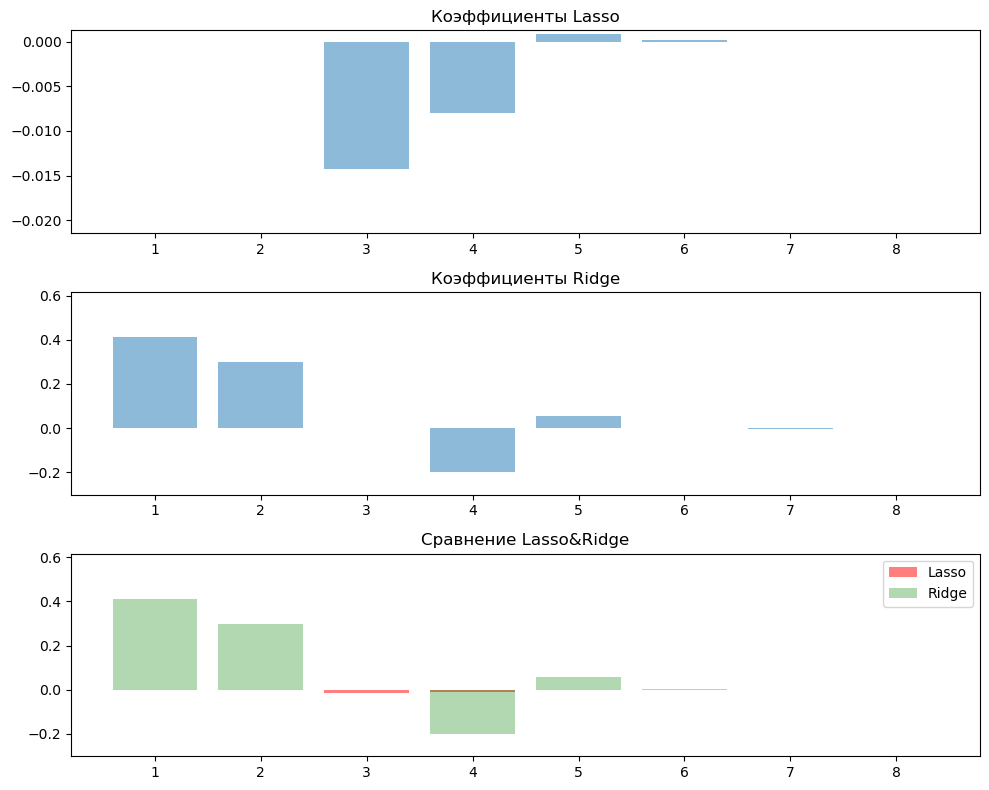

In [28]:
#Разделить данные
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)
# Lasso & Ridge
lasso = Lasso(alpha=0.8).fit(X_train, y_train)
ridge = Ridge(alpha=0.8).fit(X_train, y_train)

_, axis = plt.subplots(3, figsize=(10, 8))

#Коэффициенты Lasso (исключающее незначащие фичи) для множества фич
axis[0].bar(range(1, 9), lasso.coef_, alpha=0.5)
axis[0].set_title('Коэффициенты Lasso')
axis[0].set_ylim([min(lasso.coef_)*1.5, max(lasso.coef_)*1.5])

#Коэффициенты Ridge (все фичи)
axis[1].bar(range(1, 9), ridge.coef_, alpha=0.5)
axis[1].set_title('Коэффициенты Ridge')
axis[1].set_ylim([min(ridge.coef_)*1.5, max(ridge.coef_)*1.5])

#Общий график
axis[2].bar(range(1, 9), lasso.coef_, alpha=0.5, color='red', label='Lasso')
axis[2].bar(range(1, 9), ridge.coef_, alpha=0.3, color='green', label='Ridge')
axis[2].set_title('Сравнение Lasso&Ridge')
axis[2].legend()
_share = np.concatenate((lasso.coef_, ridge.coef_))
axis[2].set_ylim([min(_share)*1.5, max(_share)*1.5])

plt.tight_layout()
plt.show()